In [1]:
#Imports
import numpy
import matplotlib as mpl
import pylab
import scipy.stats
%matplotlib inline

#Plot formatting stuff
font = {'family' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rc("savefig", dpi=400)

In [2]:
#The classic hbar c
LConv=197.*10**-9

In [3]:

#Energy resolution
Eres=lambda mi,mh: mh**2/(2*mi)


OscProb3p1=lambda L,E,dm2,mix:mix*numpy.sin((1.27*dm2*L/E)*1e6)**2



combined matrix shape:  (60, 60)


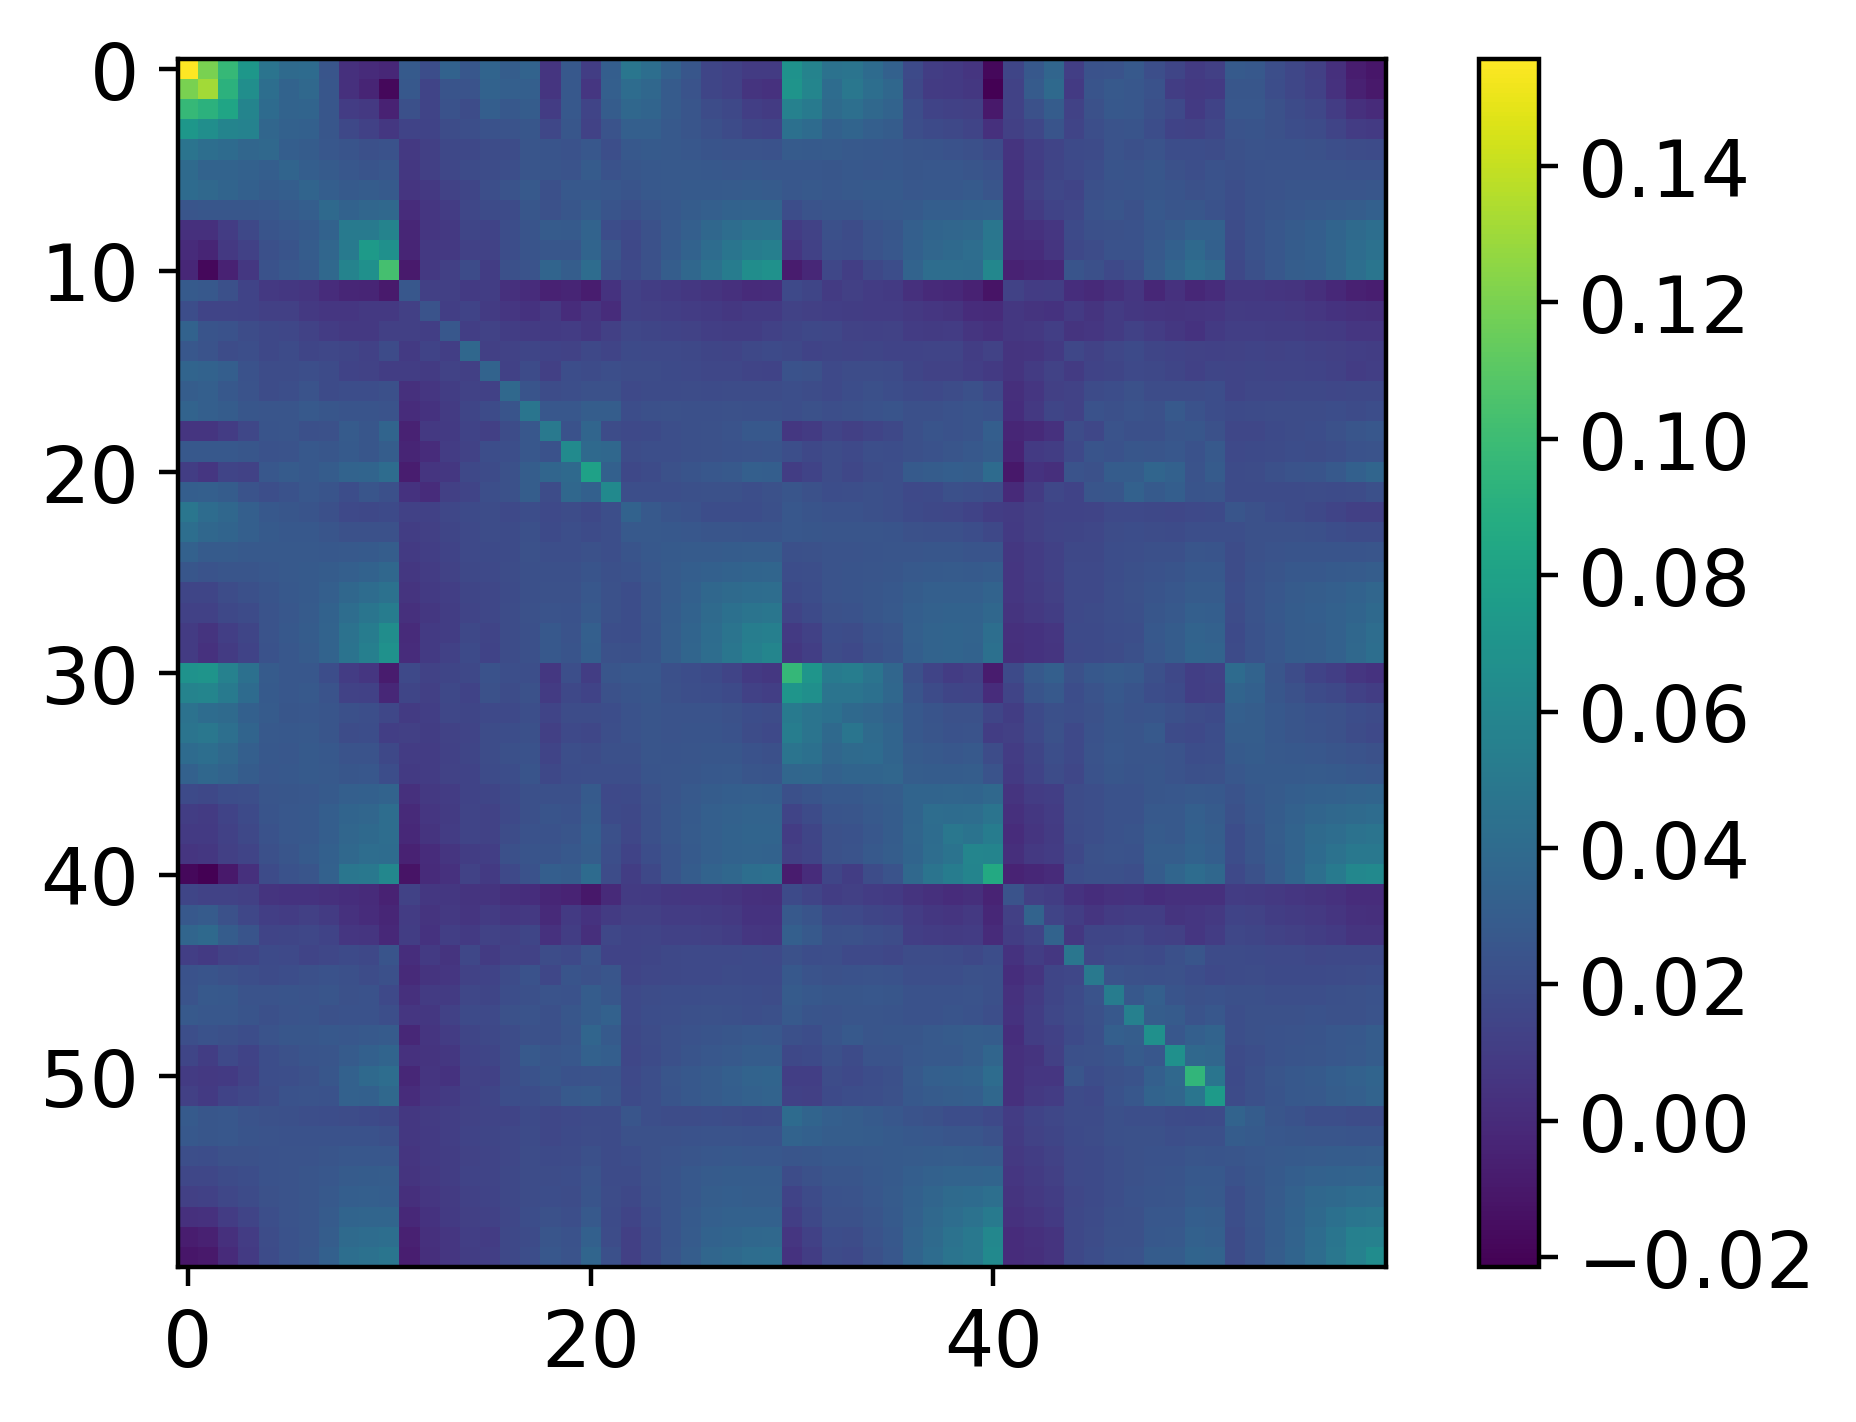

nu matrix shape:  (30, 30)


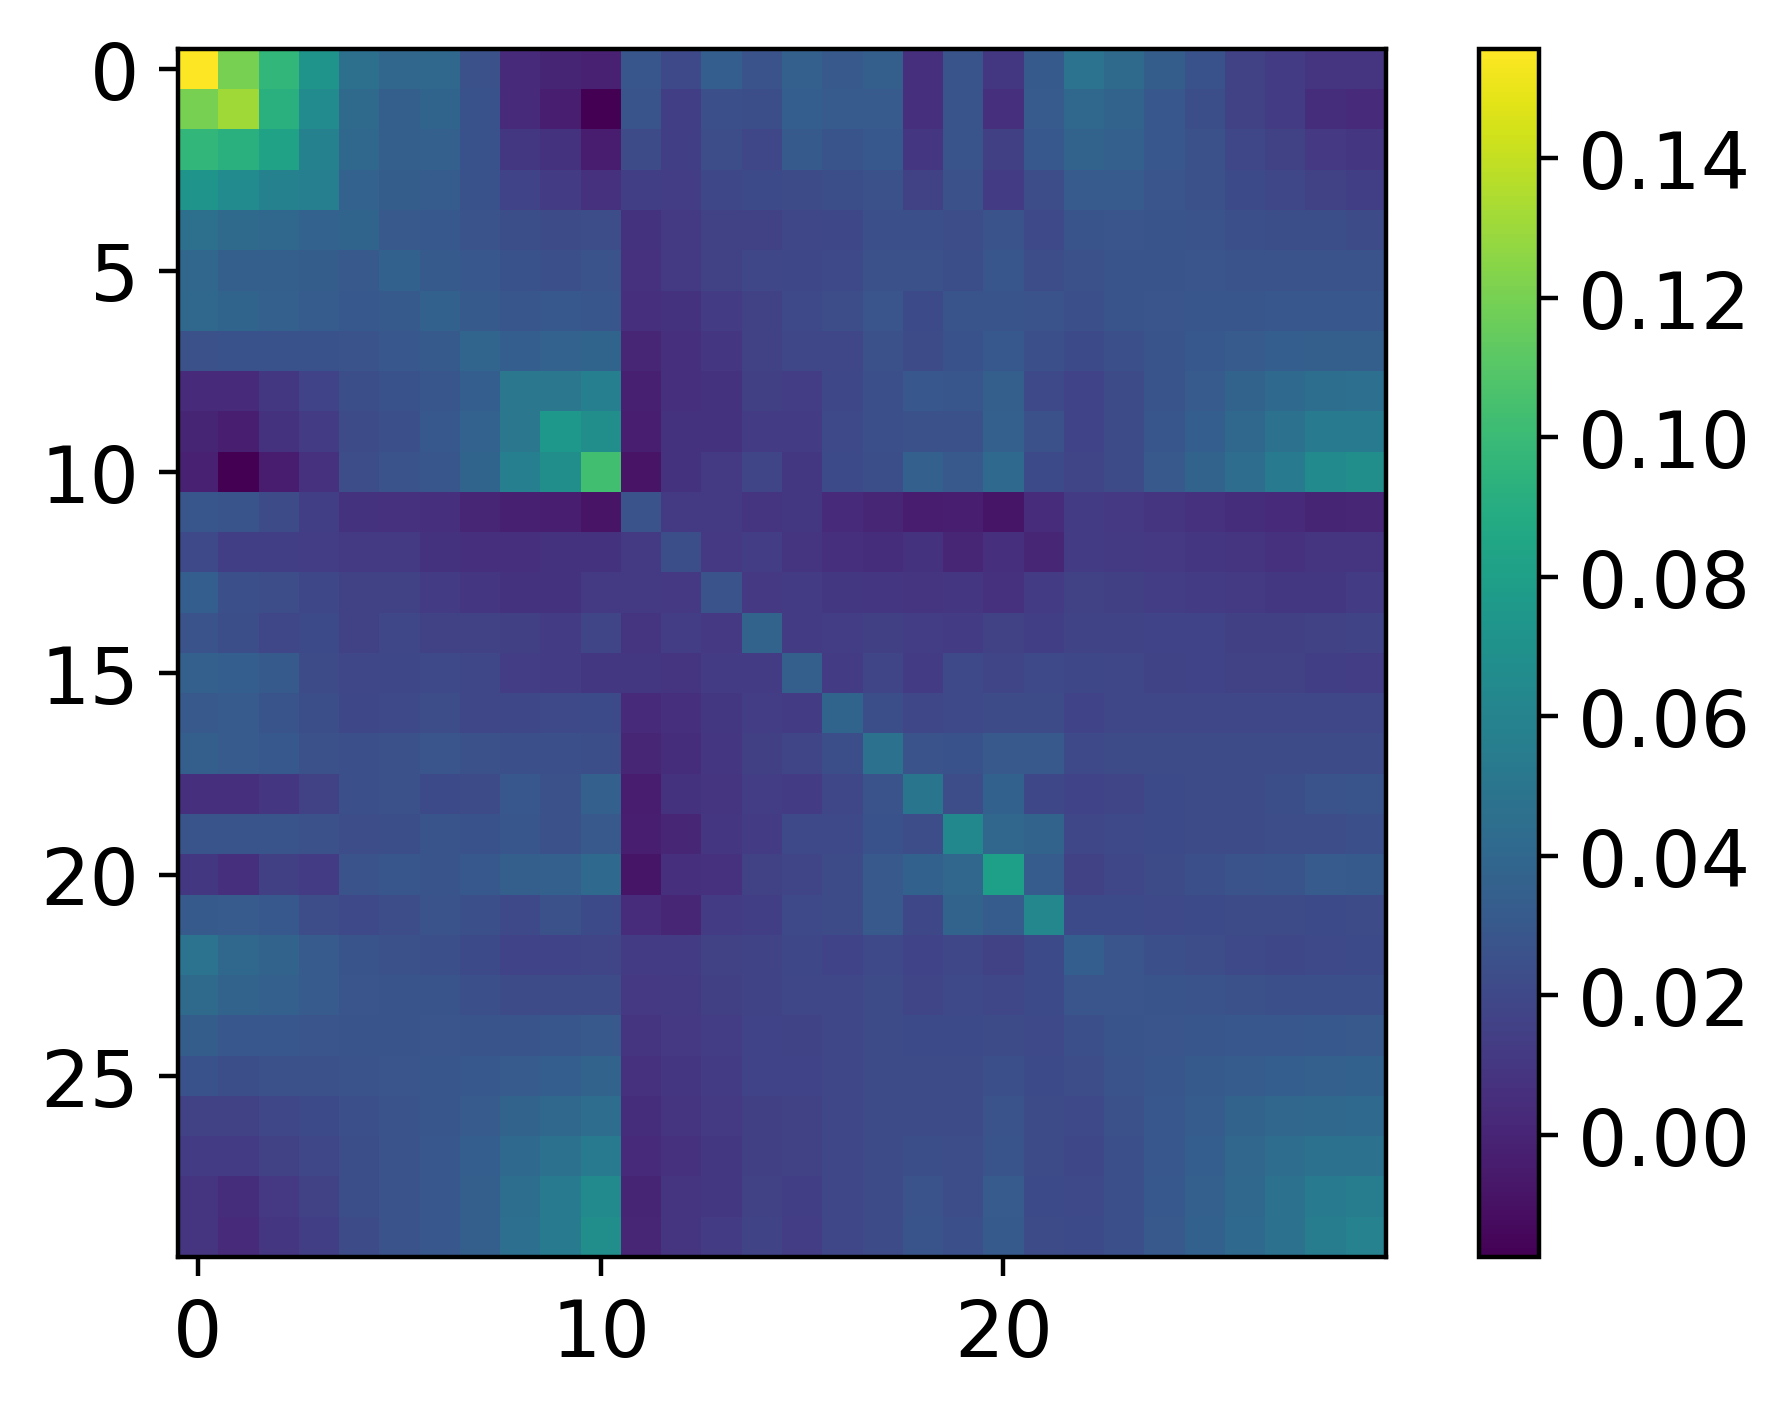

nubar matrix shape:  (30, 30)


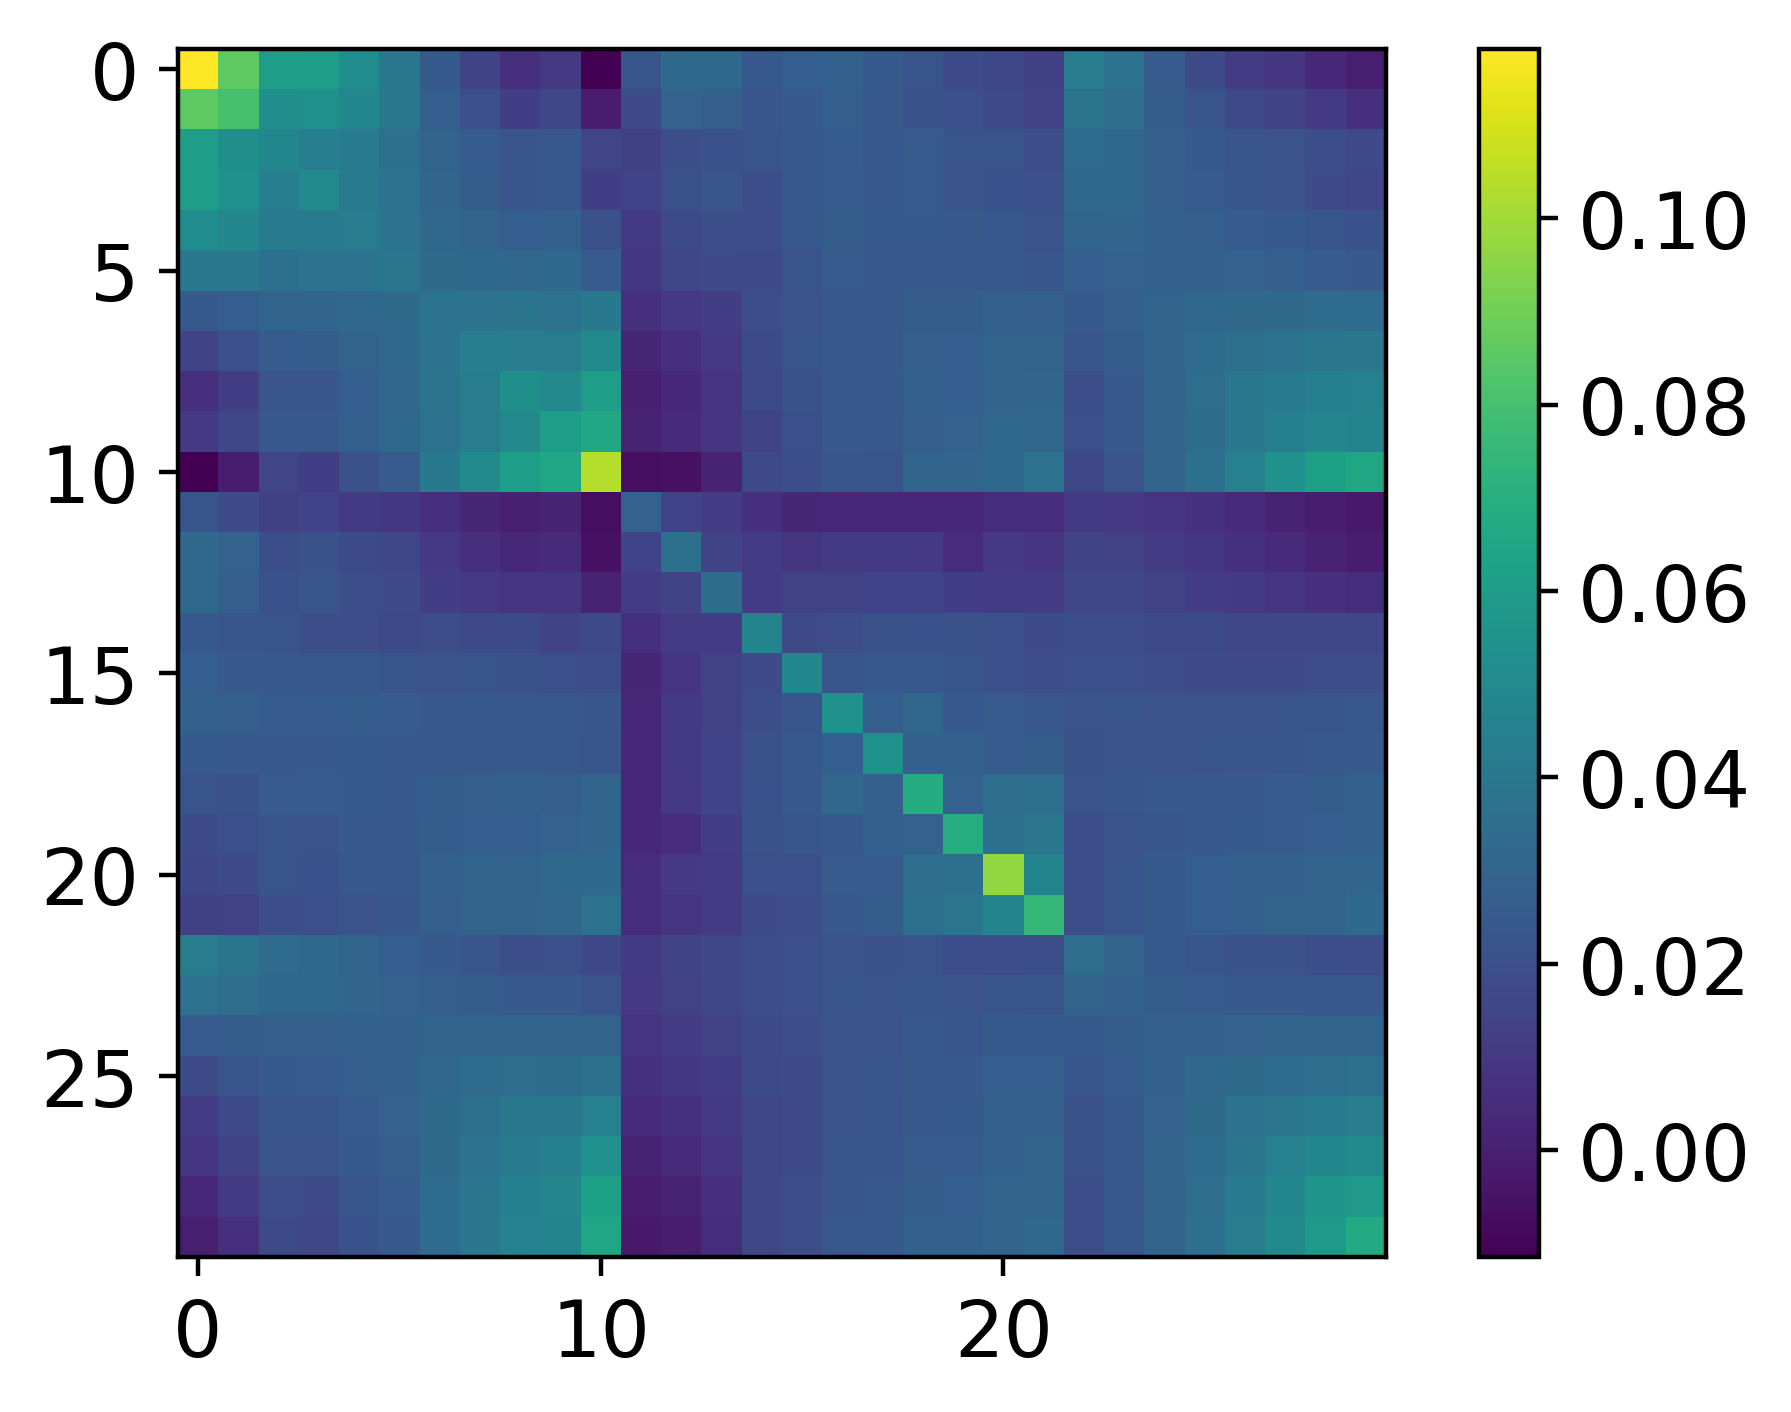

In [26]:
#Load MiniBooNE data
MBBinEdges=numpy.loadtxt("MBData/miniboone_binboundaries_nue_lowe.txt")

MBCounts=numpy.loadtxt("MBData/miniboone_nuedata_lowe.txt")
MBBackground=numpy.loadtxt("MBData/miniboone_nuebgr_lowe.txt")
MBSimEvents=numpy.loadtxt("MBData/miniboone_numunuefullosc_ntuple.txt")
MBMuons=numpy.loadtxt("MBData/miniboone_numudata.txt")
MBMuonPrediction=numpy.loadtxt("MBData/miniboone_numu.txt")

MBCounts_an=numpy.loadtxt("MBData/miniboone_nuebardata_lowe.txt")
MBBackground_an=numpy.loadtxt("MBData/miniboone_nuebarbgr_lowe.txt")
MBSimEvents_an=numpy.loadtxt("MBData/miniboone_numubarnuebarfullosc_ntuple.txt")
MBMuons_an=numpy.loadtxt("MBData/miniboone_numubardata.txt")
MBMuonPrediction_an=numpy.loadtxt("MBData/miniboone_numubar.txt")

MBCovNu= numpy.loadtxt("MBData/miniboone_full_fractcovmatrix_nu_lowe.txt")
MBCovNubar= numpy.loadtxt("MBData/miniboone_full_fractcovmatrix_nubar_lowe.txt")
MBCovCombined = numpy.loadtxt("MBData/miniboone_full_fractcovmatrix_combined_lowe.txt")

#MBTransmutedNu=numpy.histogram(MBSimEvents[:,0],weights=MBSimEvents[:,3]*float(len(MBSimEvents)),bins=MBBinEdges)[0]
MBTransmutedNu=numpy.histogram(MBSimEvents[:,0],weights=MBSimEvents[:,3]/float(len(MBSimEvents)),bins=MBBinEdges)[0]


print "combined matrix shape: ", MBCovCombined.shape
pylab.imshow(MBCovCombined)
pylab.colorbar()
pylab.show()
print "nu matrix shape: ", MBCovNu.shape
pylab.imshow(MBCovNu)
pylab.colorbar()
pylab.show()
print "nubar matrix shape: ", MBCovNubar.shape
pylab.imshow(MBCovNubar)
pylab.colorbar()
pylab.show()

In [5]:
numpy.concatenate([MBBackground,MBMuonPrediction])

array([   180.80171 ,    108.22448 ,    120.03353 ,     63.887782,
           89.806966,     67.249431,     69.855878,     57.014477,
           51.846417,     38.586738,     69.381391,  19402.247   ,
        29854.561   ,  26700.085   ,  18701.467   ,  11572.734   ,
         6250.383   ,   3025.1541  ,   1409.3744  ])

In [21]:
signal




NameError: name 'signal' is not defined

In [6]:
len(MBCovNu)

30

In [11]:
MBTransmutedNu

array([  4459.24992676,   5091.45612375,   9817.3931742 ,   8175.82534382,
        14600.44609783,  13767.6975297 ,  14169.27622657,  11102.67801173,
        10613.13320605,   6011.60698482,   6321.19168902])

In [22]:

    
def DrawMBOscillated3p1(dm2,mix,BinEdge,MBSim,MBBack,MBData,FileName=""):
    NewWeight=[]
    for i in MBSim:
        NewWeight.append(OscProb3p1(i[2]/1e2,i[1]*1e6,dm2,mix))
    BGCenters=(BinEdge[:-1]+BinEdge[1:])/2
    HistX=  [BGCenters,MBSim[:,0]]
    HistWts=[MBBack,MBSim[:,3]*numpy.array(NewWeight)/float(len(MBSim))]
    pylab.figure(figsize=(6,6),dpi=400)
    pylab.hist(HistX,weights=HistWts,bins=BinEdge,stacked=True,rwidth=1,alpha=0.5,label=["MB Background","Best-Fit Excess"])
    pylab.errorbar((BinEdge[:-1]+BinEdge[1:])/2,MBData,yerr=pow(MBData,0.5),xerr=(BinEdge[:-1]-BinEdge[1:])/2,color='black',linewidth=2,label='Data',linestyle='none')
    pylab.legend(loc='upper right')
    pylab.xlim(0,2000)
    pylab.xlabel("Energy / MeV")
    pylab.ylabel("Count / MeV")
    pylab.tight_layout()
    if(FileName!=""):
        pylab.savefig(FileName,dpi=200,bbox_inches=0)
    pylab.show()
    

#Recipe from https://www-boone.fnal.gov/for_physicists/data_release/lowe/miniboone_may09publicdata_instructions.pdf
def Chi2MBOscillated3p1Nu(dm2,mix):
    NewWeight=[]
    for i in MBSimEvents:
        NewWeight.append(OscProb3p1(i[2]/1e2,i[1]*1e6,dm2,mix))
    import pdb
    pdb.set_trace()
    signal=numpy.histogram(MBSimEvents[:,0],weights=MBSimEvents[:,3]*numpy.array(NewWeight)/float(len(MBSimEvents)),bins=MBBinEdges)[0]
#    print signal
    MBDataFit2by2       = numpy.concatenate([MBCounts,MBMuons])
    MBPredictionFit2by2 = numpy.concatenate([signal+MBBackground,MBMuonPrediction])
    MBResidual2by2      = MBDataFit2by2-MBPredictionFit2by2

#    P3by3 = numpy.concatenate([signal,MBBackground,MBMuonPrediction])
    P3by3 = numpy.concatenate([MBTransmutedNu,MBBackground,MBMuonPrediction])
    from numpy import linalg 
    TheCov=numpy.zeros_like(MBCovNu)
    for i in range(MBCovNu.shape[0]):
        for j in range(MBCovNu.shape[1]):
            TheCov[i,j] = MBCovNu[i,j] * P3by3[i]*P3by3[j]
    for i in range(0,len(signal)):
        TheCov[i,i]+=signal[i]
    
    Block11 = TheCov[0:11,0:11]+TheCov[11:22,11:22]+TheCov[11:22,0:11]+TheCov[0:11,11:22]
    Block22 = TheCov[22:30,22:30]
    Block12 = TheCov[0:11,22:30]+TheCov[11:22,22:30]
    Block21 = TheCov[22:30,0:11]+TheCov[22:30,11:22]

    CovMatrix2by2=numpy.block(     [ [Block11, Block12],
                                    [Block21, Block22]  ]   )
    pylab.imshow(CovMatrix2by2)
    Covinv2by2 = linalg.inv(CovMatrix2by2)

    chi2 = numpy.dot(MBResidual2by2.T,numpy.dot(Covinv2by2,MBResidual2by2).T)
    
    return float(chi2)




In [25]:
Chi2MBOscillated3p1Nu(1,1e-3)

# Get chi2 arrays over the parameter space in nu and nubar mode
#  and find minima

dm2 = numpy.logspace(-2, 2, 40)
mix = numpy.logspace(-3.5,0,40)
gridX, gridY = numpy.meshgrid(mix, dm2)

import pdb
pdb.set_trace()

gridZNuE=[]
for j in range(0,len(dm2)):
    gridZRow=[]
    for i in range(0,len(mix)):
        gridZRow.append(Chi2MBOscillated3p1Nu(dm2[j],mix[i]))
    print j
    gridZNuE.append(gridZRow)
minZNuE=min(numpy.array(gridZNuE).flatten())


gridZNuEBar=[]
for j in range(0,len(dm2)):
    gridZRow=[]
    for i in range(0,len(mix)):
#        gridZRow.append(Chi2MBOscillated3p1(dm2[j],mix[i],MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an,MBCov_anu ))
        gridZRow.append(0)
    print j
    gridZNuEBar.append(gridZRow)
minZNuEBar=min(numpy.array(gridZNuEBar).flatten())



> <ipython-input-22-81edf85ebca1>(30)Chi2MBOscillated3p1Nu()
-> signal=numpy.histogram(MBSimEvents[:,0],weights=MBSimEvents[:,3]*numpy.array(NewWeight)/float(len(MBSimEvents)),bins=MBBinEdges)[0]
(Pdb) where
  /Users/chur558/anaconda2/lib/python2.7/runpy.py(162)_run_module_as_main()
-> "__main__", fname, loader, pkg_name)
  /Users/chur558/anaconda2/lib/python2.7/runpy.py(72)_run_code()
-> exec code in run_globals
  /Users/chur558/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py(3)<module>()
-> app.launch_new_instance()
  /Users/chur558/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py(658)launch_instance()
-> app.start()
  /Users/chur558/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py(474)start()
-> ioloop.IOLoop.instance().start()
  /Users/chur558/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py(177)start()
-> super(ZMQIOLoop, self).start()
  /Users/chur558/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py(887)start()
-> h

BdbQuit: 

In [91]:
RelPlot=numpy.array(gridZNuE)-min(numpy.array(gridZNuE).flatten())


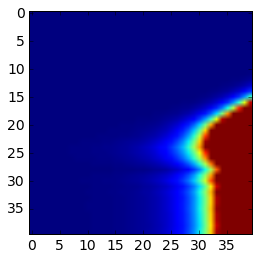

In [92]:
pylab.imshow(RelPlot)
pylab.clim(0,10)


In [93]:
gridZNuE

[[4.4070317274057755,
  4.407031696535187,
  4.40703165857852,
  4.407031611909298,
  4.407031554527586,
  4.407031483974624,
  4.407031397226991,
  4.407031290567575,
  4.4070311594259906,
  4.407030998182894,
  4.4070307999292435,
  4.407030556170469,
  4.407030256462326,
  4.407029887964054,
  4.407029434888232,
  4.407028877825144,
  4.407028192911711,
  4.407027350810947,
  4.407026315456731,
  4.407025042511916,
  4.4070234774738335,
  4.407021553346572,
  4.407019187782763,
  4.407016279572822,
  4.407012704336443,
  4.407008309234618,
  4.4070029064846254,
  4.406996265410091,
  4.406988102702773,
  4.406978070504291,
  4.4069657418352115,
  4.4069505928057,
  4.406931980933142,
  4.40690911877059,
  4.4068810419176385,
  4.406846570346145,
  4.406804261843722,
  4.40675235627485,
  4.406688709321397,
  4.406610714451993],
 [4.407031646253088,
  4.407031596754709,
  4.407031535894429,
  4.407031461064373,
  4.4070313690579965,
  4.407031255932773,
  4.407031116841265,
  4.40703

In [94]:
#Find the best fits

minZSum=min(numpy.array(gridZNuE).flatten()+numpy.array(gridZNuEBar).flatten())
argZsum=numpy.argmin(numpy.array(gridZNuE).flatten()+numpy.array(gridZNuEBar).flatten())
argZnu=numpy.argmin(numpy.array(gridZNuE).flatten())
argZnubar=numpy.argmin(numpy.array(gridZNuEBar).flatten())

minXnu=gridX.flatten()[argZnu]
minYnu=gridY.flatten()[argZnu]
minXnubar=gridX.flatten()[argZnubar]
minYnubar=gridY.flatten()[argZnubar]
minXboth=gridX.flatten()[argZsum]
minYboth=gridY.flatten()[argZsum]



In [95]:
18.9+15.26

34.16

In [96]:
gridZNuE=numpy.array(gridZNuE,dtype=float)
gridZNuEBar=numpy.array(gridZNuEBar,dtype=float)



In [97]:
minYnu

0.083767764006829157

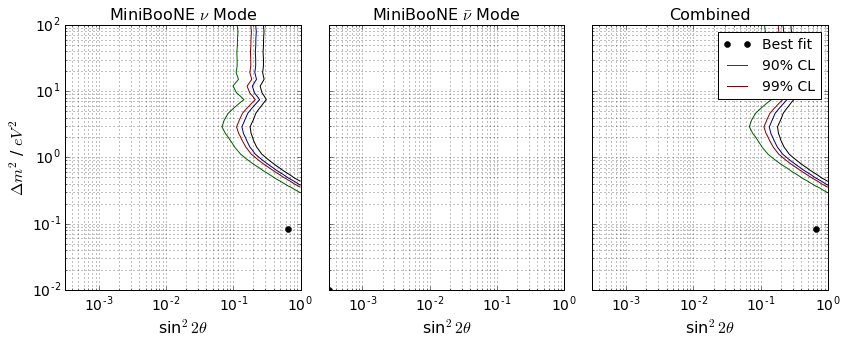

In [98]:
#Plot confidence intervals based on Wilks theorem for different samples

Cols=['DarkGreen','DarkRed','DarkBlue','black']

f, (ax1, ax2, ax3) =pylab.subplots(1,3,sharex=True, sharey=True,figsize=(12,5))
f.subplots_adjust(wspace=0)


CS = ax1.contour(gridX, gridY, (gridZNuE-minZNuE),levels=[2.3,4.6,6,9.21],colors=Cols)
ax1.plot(minXnu,minYnu,'o',color='black',label='Best fit')
ax1.plot([0,0],[0,0],color=Cols[0],label='90% CL')
ax1.plot([0,0],[0,0],color=Cols[1],label='99% CL')
#ax1.set_xlim(200,500)
ax1.loglog()
ax1.grid(which='both')
ax1.set_ylabel(r"$\Delta m^2$ / $eV^2$",fontsize=16)
ax1.set_xlabel(r"sin$^2\,2\theta$",fontsize=16)


ax1.set_title(r"MiniBooNE $\nu$ Mode",fontsize=16)

CS = ax2.contour(gridX, gridY, (gridZNuEBar-minZNuEBar),levels=[2.3,4.6,6,9.21],colors=Cols)
ax2.grid(which='both')
ax2.plot(minXnubar,minYnubar,'o',color='black',label='Best fit')
ax2.plot([0,0],[0,0],color=Cols[0],label='90% CL')
ax2.plot([0,0],[0,0],color=Cols[1],label='99% CL')
#ax2.set_xlim(200,500)
ax2.loglog()
ax2.set_xlabel(r"sin$^2\,2\theta$",fontsize=16)
ax2.set_title(r"MiniBooNE $\bar{\nu}$ Mode",fontsize=16)


CS = ax3.contour(gridX, gridY, ((numpy.array(gridZNuEBar)+numpy.array(gridZNuE)))-minZSum,levels=[2.3,4.6,6,9.21],colors=Cols)
ax3.grid(which='both')
ax3.plot(minXboth,minYboth,'o',color='black',label='Best fit')
ax3.plot([0,0],[0,0],color=Cols[0],label='90% CL')
ax3.plot([0,0],[0,0],color=Cols[1],label='99% CL')
#ax3.set_xlim(200,500)
ax3.loglog()
ax3.legend(loc='upper right',fontsize=14)
ax3.set_xlabel(r"sin$^2\,2\theta$",fontsize=16)
ax3.set_title(r"Combined",fontsize=16)
f.subplots_adjust(wspace=0)

pylab.tight_layout()
pylab.savefig("FitPlots3p1.png",dpi=200,bbox_inches=0)

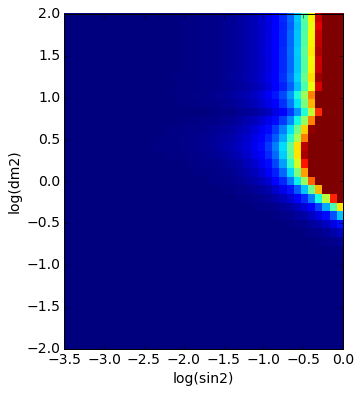

In [99]:
pylab.figure(figsize=(5,6))
pylab.hist2d(numpy.log10(gridX.flatten())-0.01,numpy.log10(gridY.flatten())-0.01,weights=(gridZNuE-minZNuE).flatten(),bins=(numpy.log10(numpy.unique(gridX.flatten())),numpy.log10(numpy.unique(gridY.flatten()))))
pylab.xlabel("log(sin2)")
pylab.ylabel("log(dm2)")
pylab.clim(0,30)

In [50]:
print Chi2MBOscillated3p1(8e-2,0.4,MBBinEdges,MBSimEvents,MBBackground,MBCounts,MBCov_nu)
print Chi2MBOscillated3p1(8e-2,0.4,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an,MBCov_anu)
print Chi2MBOscillated3p1(8e-2,0.4,MBBinEdges,MBSimEvents,MBBackground,MBCounts,MBCov_nu)+Chi2MBOscillated3p1(8e-2,0.4,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an,MBCov_anu)

11.4336020582
4.68396823081
16.117570289


In [55]:
print Chi2MBOscillated3p1(1.75,4*3.6e-4,MBBinEdges,MBSimEvents,MBBackground,MBCounts,MBCov_nu)
print Chi2MBOscillated3p1(1.75,4*3.6e-4,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an,MBCov_anu)
print Chi2MBOscillated3p1(1.75,4*3.6e-4,MBBinEdges,MBSimEvents,MBBackground,MBCounts,MBCov_nu)+Chi2MBOscillated3p1(1.75,4*3.6e-4,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an,MBCov_anu)

22.9885430395
12.4542781137
35.4428211532


In [10]:
MBBinEdges

array([  200.,   300.,   375.,   475.,   550.,   675.,   800.,   950.,
        1100.,  1300.,  1500.,  3000.])

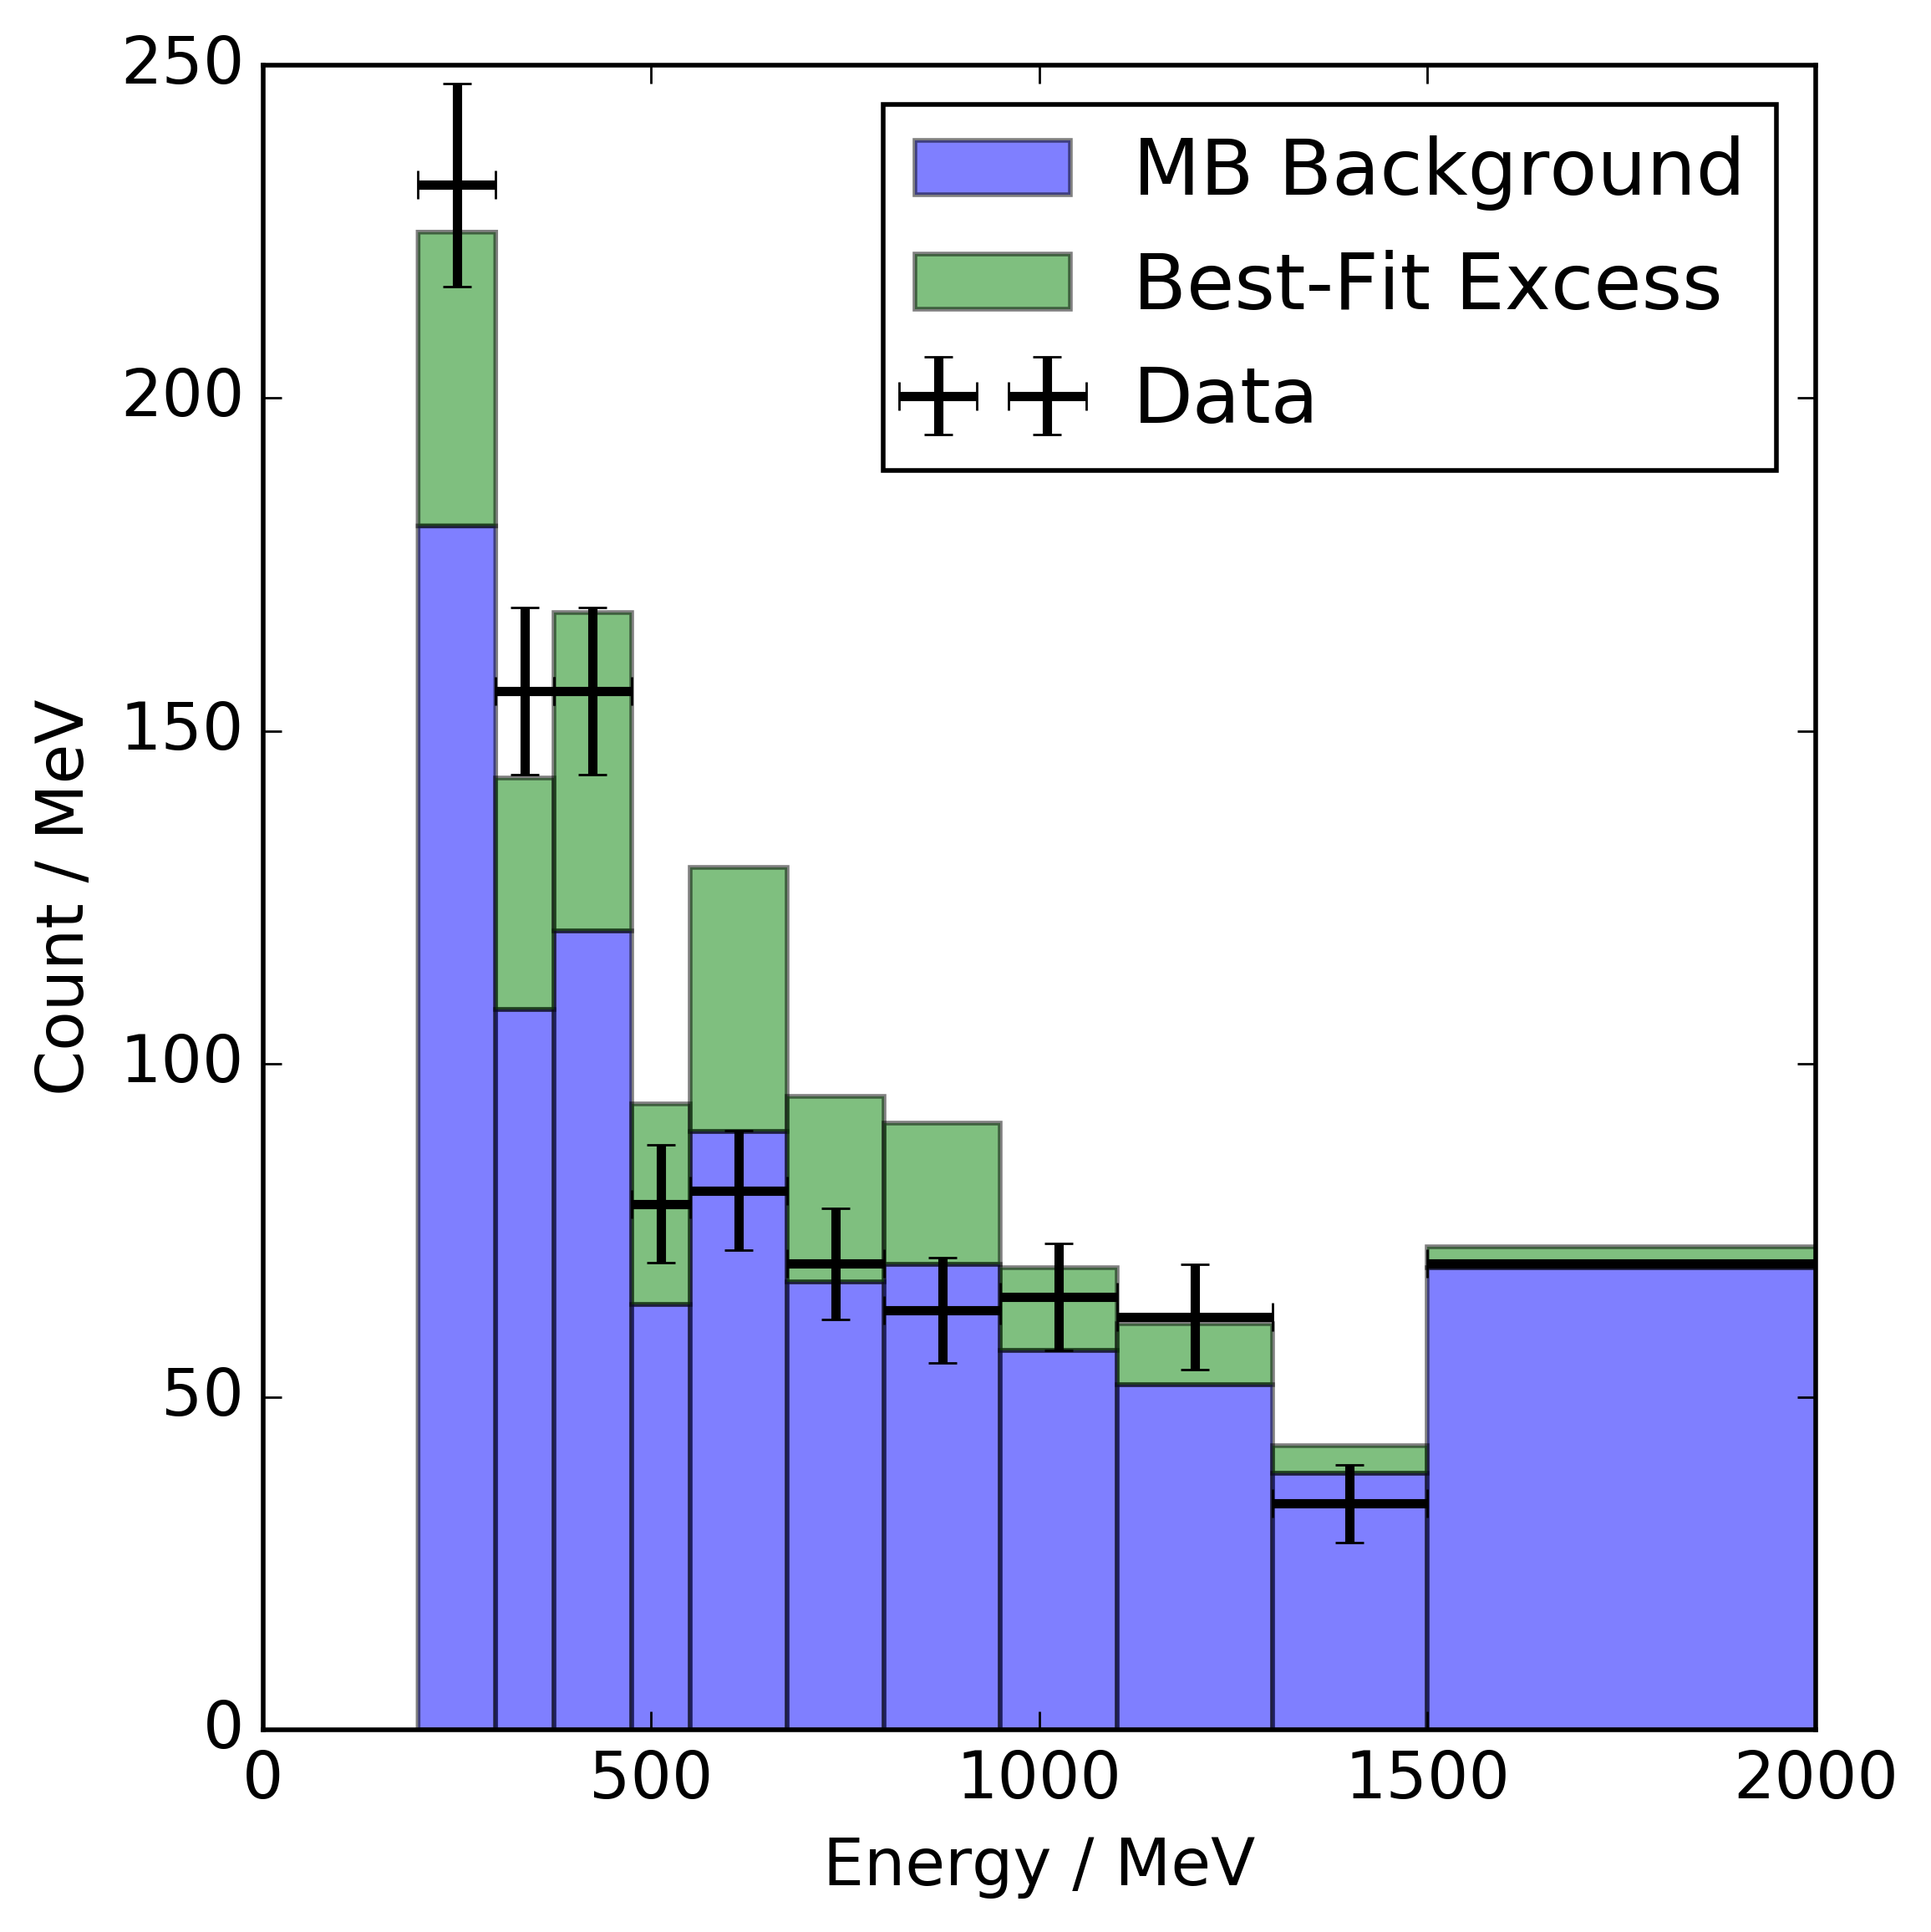

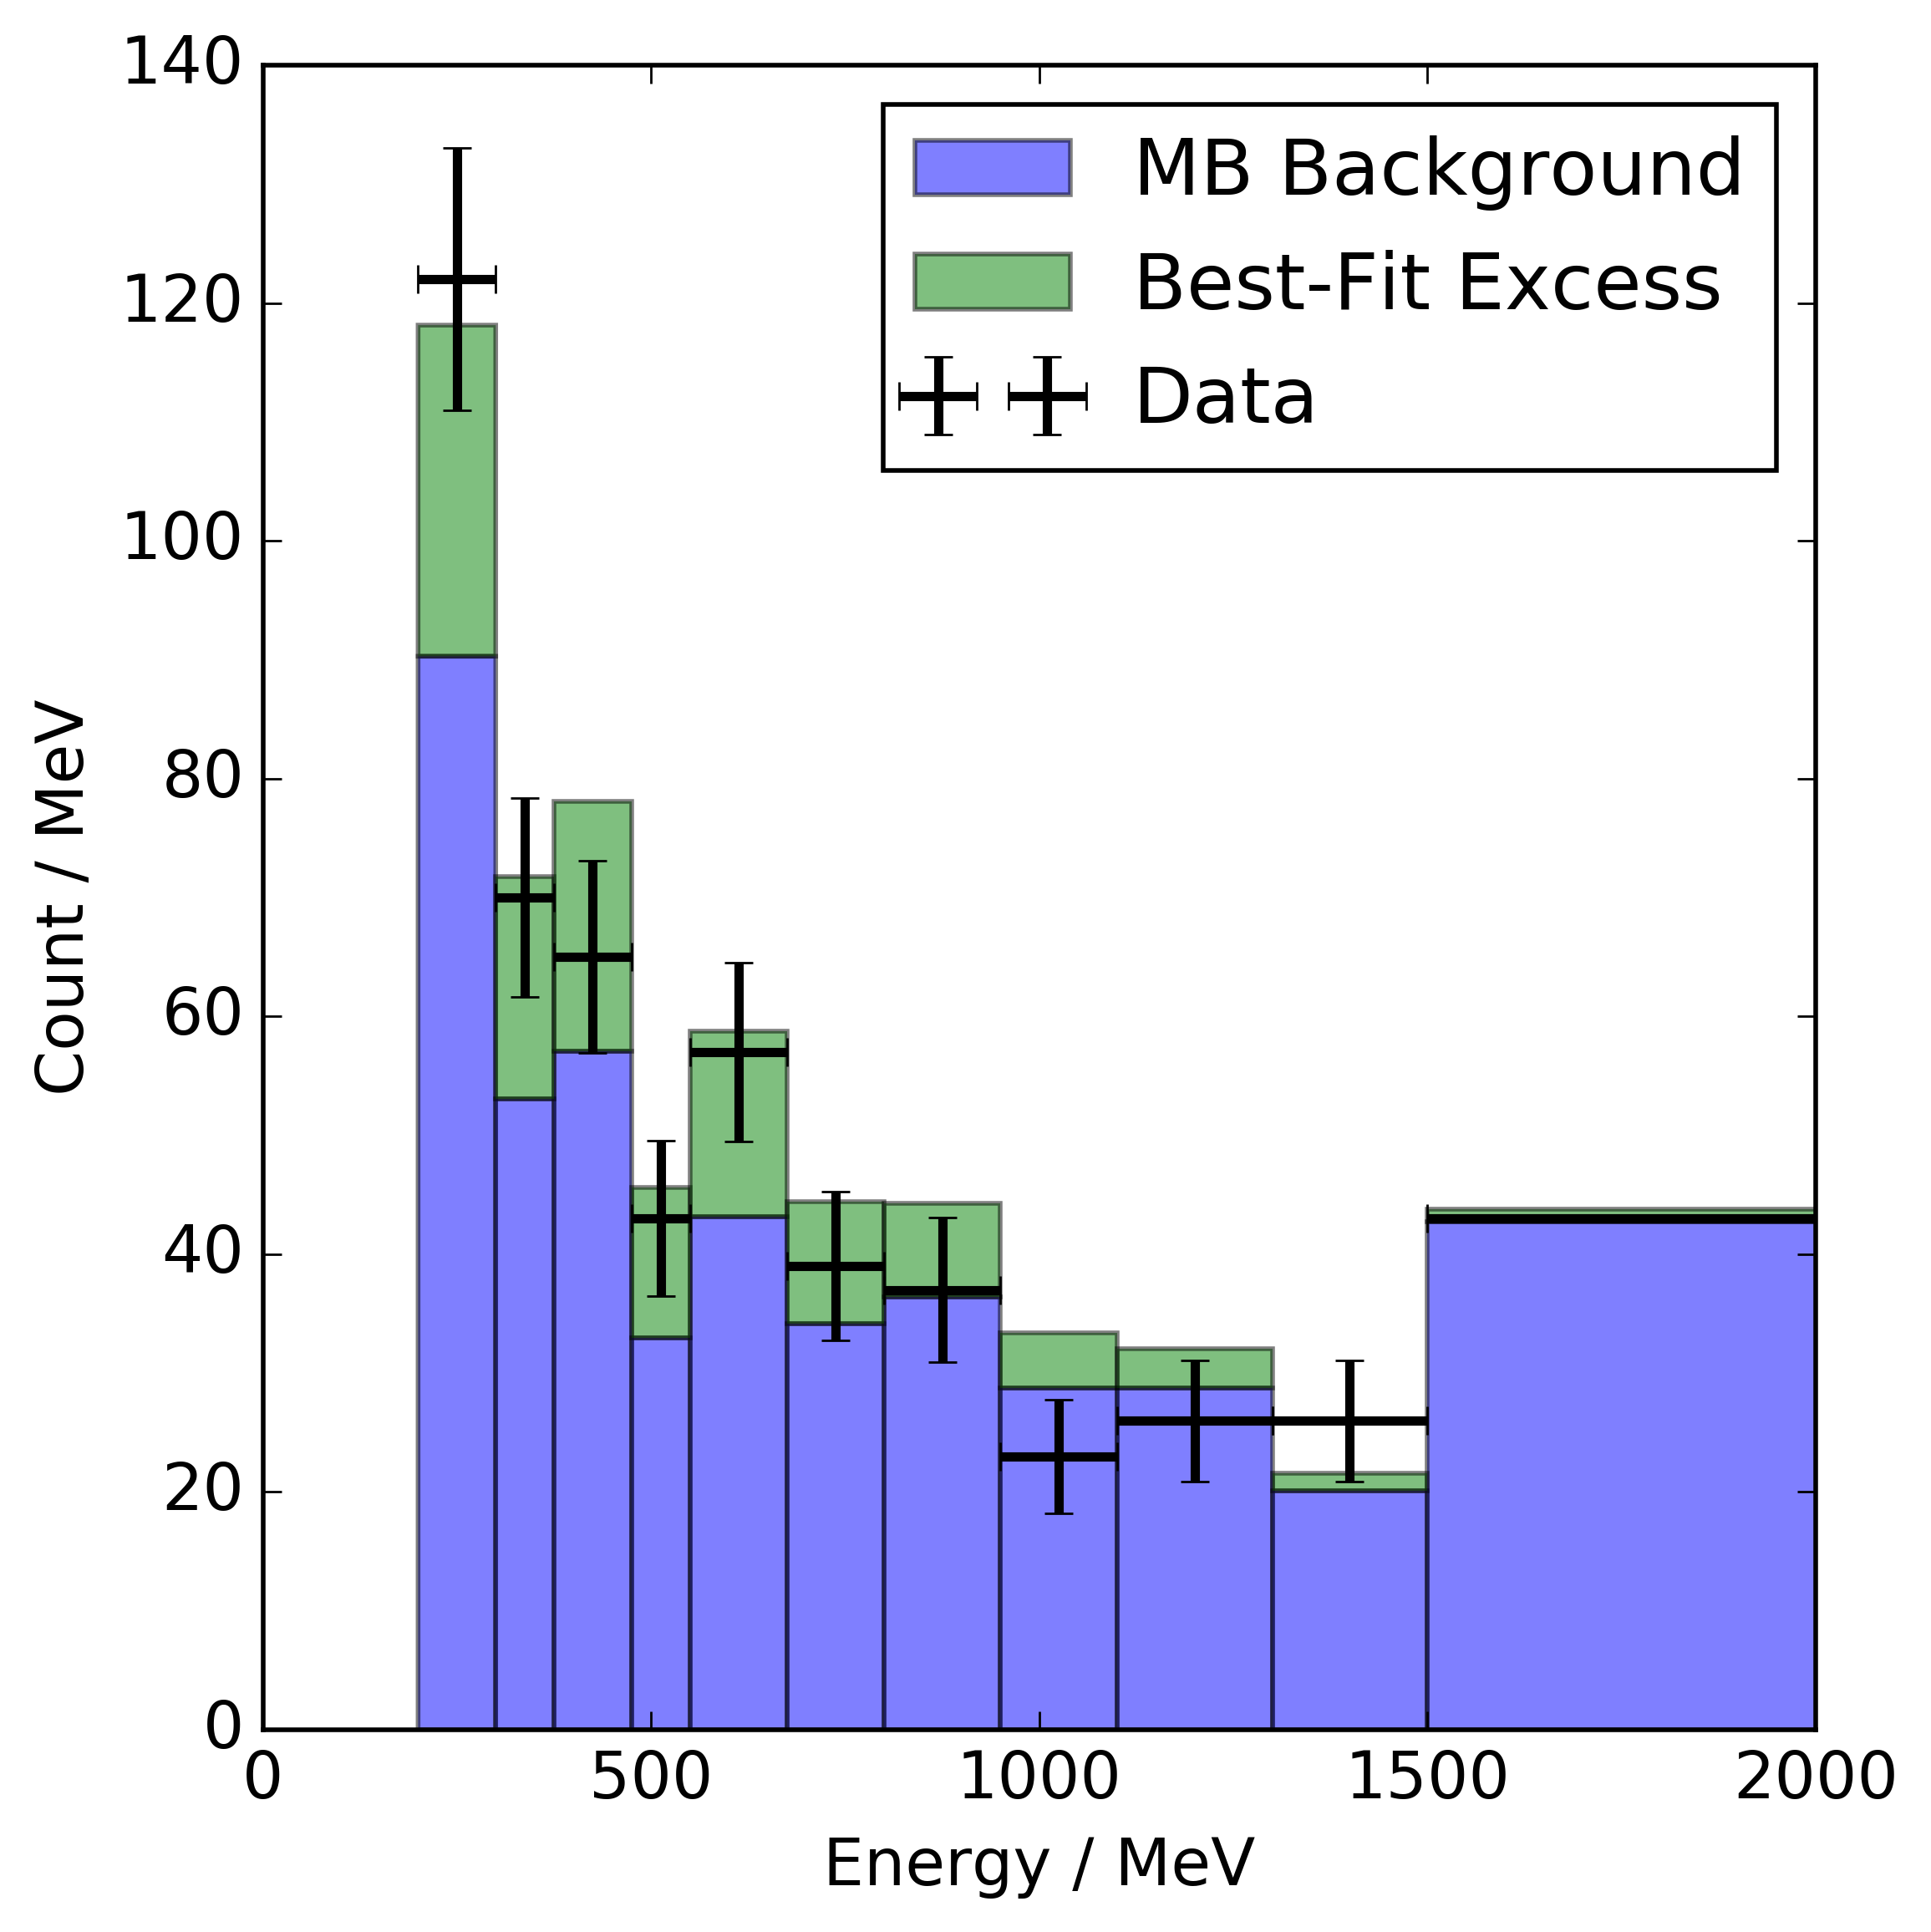

In [42]:
#Plot best fit points

#Nu Mode combined best fit
DrawMBOscillated3p1(8e-2,0.4,MBBinEdges,MBSimEvents,MBBackground,MBCounts)

#NuBar Mode combined best fit
DrawMBOscillated3p1(8e-2,0.4,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an)

In [19]:
# Print out the Chi2s
print "Neutrino Null:", Chi2MBOscillated(0,0,MBBinEdges,MBSimEvents,MBBackground,MBCounts)
print "Antineutrino Null:", Chi2MBOscillated(0,0,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an)
print "Neutrino BF:", minZNuE
print "AntiNeutrino BF:", minZNuEBar
print "Both BF:",minZSum

Neutrino Null: 55.2466949178
Antineutrino Null: 28.9736859717
Neutrino BF: 11.4196991148
AntiNeutrino BF: 4.6629351984
Both BF: 16.0901417804


In [20]:
Chi2MBOscillated3p1(100,3e-3,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an)

21.936465244580749

In [21]:
Chi2MBOscillated3p1(1000,3e-3,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an)

21.863933837506416

In [22]:
Chi2MBOscillated3p1(10000,3e-3,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an)

21.851480667797819

In [23]:
Chi2MBOscillated3p1(100000,3e-3,MBBinEdges,MBSimEvents_an,MBBackground_an,MBCounts_an)

21.856870977637914

In [24]:
minXnu

1.0

In [25]:
minYnu

0.051151780992931425

In [26]:
Chi2MBOscillated3p1(minYnu,minXnu,MBBinEdges,MBSimEvents,MBBackground,MBCounts)

41.569842804330904

In [27]:
MBData

NameError: name 'MBData' is not defined

In [ ]:
pylab.hist(numpy.array(gridZNuE).flatten(),bins=numpy.arange(20,30,0.1))

In [ ]:
SomeList=[1,2,3,4,5]

M1=numpy.matrix(numpy.diag(SomeList))
M2=numpy.diag(numpy.matrix(SomeList))

In [ ]:
M1+M2

In [ ]:
gridX.flatten()[264]

In [ ]:
gridY.flatten()[264]

In [ ]:
gridX

In [ ]:
MBCounts[-1]